# Overview

The data come from Kaggle https://www.kaggle.com/datasets/xuehaihe/medical-dialogue-dataset

This data come from the online medicare assistant dialoges, inclusing the patients questions and doctor answers.

This notebook will label patients' questions into 8 topics usig natural language processing method.

In [1]:
# !pip install -q feather-format
import pandas as pd
import numpy as np

In [2]:
df = pd.read_feather("diagnose_en_dataset.feather")
df = df[['Description', 'Doctor', 'Patient']]
df.drop_duplicates(inplace =True)
df.head()

,Description,Doctor,Patient
0,Q. What does abutment of the nerve root mean?,Hi. I have gone through your query with dilige...,"Hi doctor,I am just wondering what is abutting..."
1,"Q. Every time I eat spicy food, I poop blood. ...",Hello. I have gone through your information an...,"Hi doctor, I am a 26 year old male. I am 5 fee..."
2,Q. Will Nano-Leo give permanent solution for e...,Hi. For further doubts consult a sexologist on...,"Hello doctor, I am 48 years old. I am experien..."
3,Q. Will Kalarchikai cure multiple ovarian cyst...,Hello. I just read your query. See Kalarachi K...,"Hello doctor, I have multiple small cysts in b..."
4,Q. I masturbate only by rubbing the tip of the...,Hi. For further doubts consult a sexologist on...,"Hi doctor, During masturbation I just rub the ..."


# Top 20 description

## back pain, fertility looks like the top consulting topic 

In [6]:
# the top questions patient ask
df.Description.value_counts().head(20)

Suggest treatment for back pain                        175
Suggest treatment for infertility                      147
What are the symptoms of potential pregnancy?          146
Suggest treatment for lower back pain                  136
What are the early signs and symptoms of pregnancy?    111
What causes chest pain?                                106
Suggest treatment for hair loss                        105
How can infertility be treated?                        104
Suggest remedy for getting pregnant                    104
Suggest treatment for high blood pressure              103
What is the best treatment to get pregnant?             98
Suggest treatment for erectile dysfunction              84
Suggest remedy for mental health problem                80
What does this semen analysis report indicate?          76
Suggest treatment for severe back pain                  76
What causes abdominal pain?                             75
How to get pregnant?                                    

# Top 20 common answer

In [7]:
df.Doctor.value_counts().head(20)

Hi. For further information consult an internal medicine physician online --> https://www.icliniq.com/ask-a-doctor-online/internal-medicine-physician                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# The most frequent questions asked by patient 

Looks like some patients have't gotten help in time

In [8]:
df.Patient.value_counts().head(20)

Hello docs n experts, Since yesterday I m ejaculating red semen. I noticed it yesterday while masturbating, even today I seen same thing when I was trying to confirm was it a normal one day case or a serious issue. Now I think it is a serious problem for me. Please help me.                                                                                                                                                                                                                                                                                                                                                                                                                                     16
my liver is with homogenous parenchymal echogenecity. a septated anechoic mass is seen at segment 8 of the right hepatic lobe measuring 3.1 cm in diameter. what shall i do in order for me to stop this from growing or to get rid of it? thanks and GOD bless.                                              

# TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.snowball import EnglishStemmer
import re

In [10]:
def stem_tokenizer(text):
    stemmer = EnglishStemmer(ignore_stopwords=True)
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words 

In [11]:
texts = df.Description

In [12]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('english'),
                        tokenizer=stem_tokenizer,
                        lowercase=True,
                        max_df=0.5,
                        min_df=5
                       )

In [13]:
X = tfidf.fit_transform(texts).todense()

In [14]:
len(tfidf.vocabulary_)

7384

# LSA/LSI

Find the top topics in patient questions

In [18]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import pandas as pd
from matplotlib import pylab as plt
%matplotlib inline

In [16]:
lsa = TruncatedSVD(n_components=20)
lsa_pipe = Pipeline([('scaler', StandardScaler()), ('lsa', lsa)])
transformed_X = lsa_pipe.fit_transform(X)

/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


<BarContainer object of 20 artists>

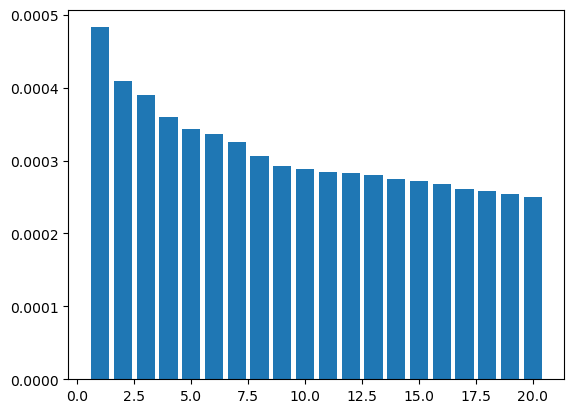

In [19]:
var_ratio = lsa_pipe['lsa'].explained_variance_ratio_
plt.bar(range(1, len(var_ratio) + 1), var_ratio)

## Group topic into 8 topics

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [21]:
lsa = TruncatedSVD(n_components=8)
lsa_pipe = Pipeline([('scaler', StandardScaler()), ('lsa', lsa)])
transformed_X = lsa_pipe.fit_transform(X)

/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [22]:
lsa_topics = pd.DataFrame(transformed_X)
lsa_topics.head()

,0,1,2,3,4,5,6,7
0,0.781528,10.811710,5.134638,8.384472,-3.293534,2.243546,5.136766,-1.509165
1,1.625457,-0.882834,-1.825592,1.942695,-1.917320,-0.706238,-0.204617,0.528169
2,1.413732,-0.481745,-1.523563,2.085483,1.009776,0.519316,-0.314249,0.741625
3,3.200103,-0.810736,1.354419,-0.420589,1.714912,-0.675519,-3.935805,1.583991
4,1.138300,-1.202976,0.027341,0.797064,-0.659552,-0.743745,0.878185,-0.905903


## Which topic the record belong

In [23]:
import numpy as np

lsa_topics['which_topic'] = lsa_topics.apply(lambda x: x.idxmax(), axis=1)
lsa_topics.head()

,0,1,2,3,4,5,6,7,which_topic
0,0.781528,10.811710,5.134638,8.384472,-3.293534,2.243546,5.136766,-1.509165,1
1,1.625457,-0.882834,-1.825592,1.942695,-1.917320,-0.706238,-0.204617,0.528169,3
2,1.413732,-0.481745,-1.523563,2.085483,1.009776,0.519316,-0.314249,0.741625,3
3,3.200103,-0.810736,1.354419,-0.420589,1.714912,-0.675519,-3.935805,1.583991,0
4,1.138300,-1.202976,0.027341,0.797064,-0.659552,-0.743745,0.878185,-0.905903,0


In [27]:
lsa_topics.which_topic.value_counts()

4    43570
2    35465
0    35151
6    34714
3    33086
7    23123
1    22617
5    19375
Name: which_topic, dtype: int64

Text(0, 0.5, 'topic 1')

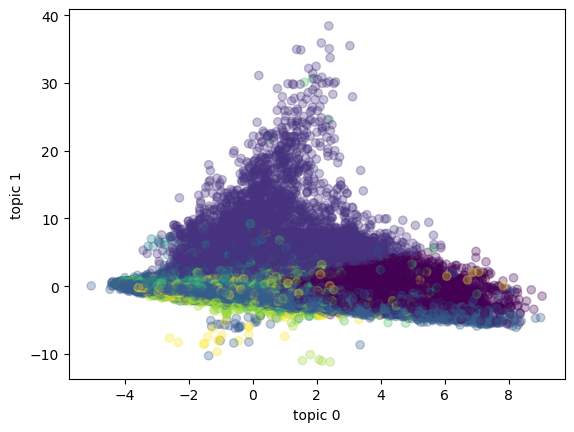

In [24]:
plt.scatter(lsa_topics[0], lsa_topics[1], alpha=0.3, c=lsa_topics['which_topic'])
plt.xlabel('topic 0')
plt.ylabel('topic 1')

## Important words for each topic

Topic 0: pregnance
Topic 1: ?
Topic 2: pain
Topic 3: old
Topic 4: suggestion on depress




In [25]:
words = [''] * len(tfidf.vocabulary_)
for k, v in tfidf.vocabulary_.items():
    words[v] = k

In [29]:
for i in range(8):
    topic_words = list(zip(words, lsa_pipe['lsa'].components_[i]))
    topic_words.sort(key=lambda x: x[1], reverse=True)
    print('--- topic {} ---'.format(i))
    for j in range(5):
        print(topic_words[j])
    print('...')
    for j in range(5):
        print(topic_words[- j - 1])
    print('')

--- topic 0 ---
('period', 0.13314984893046128)
('pregnanc', 0.13094373909460943)
('take', 0.1280535701268575)
('q', 0.11992136255808382)
('pill', 0.11324670771192591)
...
('pain', -0.25870580784913705)
('caus', -0.19500576242696754)
('suggest', -0.16086716917418334)
('back', -0.1356949807677338)
('treatment', -0.13393085245943068)

--- topic 1 ---
('disc', 0.24022310314202924)
('show', 0.173671281802088)
('mri', 0.16634800400155433)
('bulg', 0.16288433293919638)
('thecal', 0.13767233788880806)
...
('pill', -0.09177852090142531)
('period', -0.09148046598917264)
('sex', -0.08272486732066014)
('unprotect', -0.0746200380173094)
('old', -0.07419066618666105)

--- topic 2 ---
('pain', 0.17732813416436263)
('period', 0.17176734180143355)
('sex', 0.16247144902278082)
('pill', 0.15221315348906858)
('unprotect', 0.15008654826887352)
...
('old', -0.17699962393406204)
('year', -0.14636540726704372)
('level', -0.11007720807960795)
('high', -0.09412256311477903)
('month', -0.08030521792047553)

---

# Non-Negative Matrix Factorization

Modified the topic effecients, and make all of them to be positive

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import NMF

In [31]:
nmf = NMF(n_components=8)
nmf_pipe = Pipeline([('scaler', MinMaxScaler()), ('nmf', nmf)])
transformed_X = nmf_pipe.fit_transform(X)

/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [32]:
nmf_topics = pd.DataFrame(transformed_X)
nmf_topics.head()

,0,1,2,3,4,5,6,7
0,0.000282,0.000357,0.000090,0.000000,0.000705,0.000118,0.000138,0.011106
1,0.000000,0.000000,0.000109,0.000000,0.013769,0.000000,0.000100,0.010636
2,0.000000,0.000548,0.000258,0.003218,0.000274,0.000000,0.000309,0.018267
3,0.000453,0.000818,0.000000,0.000075,0.000170,0.000585,0.000000,0.012831
4,0.000000,0.000130,0.002982,0.000000,0.000236,0.001047,0.000000,0.013226


In [33]:
nmf_topics['which_topic'] = nmf_topics.apply(lambda x: x.idxmax(), axis=1)
nmf_topics.head()

,0,1,2,3,4,5,6,7,which_topic
0,0.000282,0.000357,0.000090,0.000000,0.000705,0.000118,0.000138,0.011106,7
1,0.000000,0.000000,0.000109,0.000000,0.013769,0.000000,0.000100,0.010636,4
2,0.000000,0.000548,0.000258,0.003218,0.000274,0.000000,0.000309,0.018267,7
3,0.000453,0.000818,0.000000,0.000075,0.000170,0.000585,0.000000,0.012831,7
4,0.000000,0.000130,0.002982,0.000000,0.000236,0.001047,0.000000,0.013226,7


Text(0, 0.5, 'topic 1')

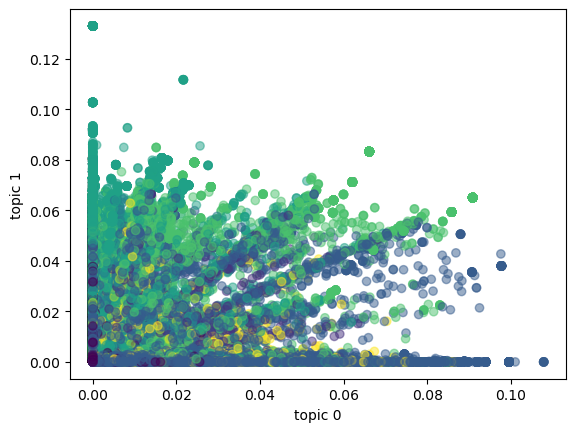

In [34]:
plt.scatter(nmf_topics[0], nmf_topics[1], alpha=0.5, c=lsa_topics['which_topic'])
plt.xlabel('topic 0')
plt.ylabel('topic 1')

In [37]:
for i in range(8):
    topic_words = list(zip(words, nmf_pipe['nmf'].components_[i]))
    topic_words.sort(key=lambda x: x[1], reverse=True)
    print('--- topic {} ---'.format(i))
    for j in range(5):
        print(topic_words[j])
    print('...')
    for j in range(5):
        print(topic_words[- j - 1])
    print('')

--- topic 0 ---
('back', 6.598343783091225)
('pain', 5.45101969654664)
('lower', 5.158031786310671)
('sever', 1.556319955532161)
('abdomin', 1.3556340868971424)
...
('zyrtec', 0.0)
('zyprexa', 0.0)
('zpack', 0.0)
('zovirax', 0.0)
('zotreem', 0.0)

--- topic 1 ---
('treatment', 5.489443863938829)
('suggest', 4.535500064550697)
('child', 0.5312631993347857)
('cough', 0.5226199295142251)
('fever', 0.49531568054102143)
...
('zylor', 0.0)
('zotreem', 0.0)
('zolpidem', 0.0)
('zolfresh', 0.0)
('zocor', 0.0)

--- topic 2 ---
('caus', 6.31471195653415)
('lump', 1.700200799065775)
('leg', 1.4821055033793258)
('swell', 1.0819500797848065)
('pain', 1.0169284030201036)
...
('zylor', 0.0)
('zotreem', 0.0)
('zoster', 0.0)
('zolpidem', 0.0)
('zolfresh', 0.0)

--- topic 3 ---
('remedi', 6.004588270460406)
('suggest', 3.1771237511425583)
('lump', 0.4684364835854448)
('problem', 0.39417556409401167)
('hair', 0.34923325548204165)
...
('zyprexa', 0.0)
('zylor', 0.0)
('zotreem', 0.0)
('zoster', 0.0)
('zolpi

# Kmeans


Cluster the patient question in to 3 subgroups

In [38]:
lsa = TruncatedSVD(n_components=30)
lsa_pipe = Pipeline([('scaler', StandardScaler()), ('lsa', lsa)])
transformed_X = lsa_pipe.fit_transform(X)

/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/Users/yaqi/miniconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [43]:
km_data = pd.DataFrame(transformed_X)
km_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.465807,11.014474,7.714795,3.576021,2.109660,1.229806,0.590791,-6.564725,-0.901614,5.124172,...,-0.956978,-3.070385,3.741076,4.011500,3.000722,0.709994,-0.007778,-2.315430,0.469485,4.316983
1,1.674686,-1.115195,-0.774255,1.698951,0.159902,-1.026577,1.199882,-1.260564,0.340057,1.368083,...,0.414981,-0.765041,0.214150,-0.664120,-0.510442,-1.113606,2.550206,-2.459241,0.695380,1.174686
2,1.388684,-0.481579,-0.120019,2.250720,0.799386,1.368455,0.107636,-0.408056,0.015727,-0.045209,...,-0.431148,-1.099451,0.382600,-0.924288,0.394694,0.785180,-0.083745,-0.569663,-0.277574,0.626578
3,2.962521,-0.035301,2.031315,-2.393421,-0.786033,0.304689,-2.005744,0.820801,1.871316,1.954077,...,-1.661023,-2.134196,0.489841,-0.364659,-4.161484,1.949397,-2.921293,2.104893,-4.655138,-3.185505
4,1.023395,-1.547683,1.103450,0.573560,-0.978015,0.036572,1.161684,-1.621623,-0.809727,0.264335,...,-0.147446,-0.164237,-0.231843,-0.707736,-0.253166,0.561799,-0.041032,0.136081,-0.293190,0.670232


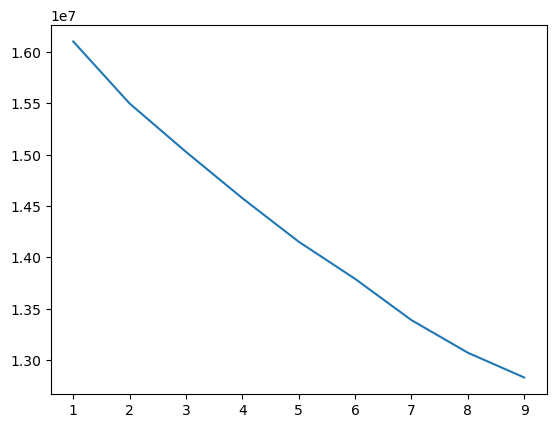

In [40]:
from sklearn.cluster import KMeans
inertia = []
for i in range(1, 10):
    km = KMeans(n_clusters=i)
    km.fit(transformed_X)
    inertia.append(km.inertia_)
    
plt.plot(range(1,10), inertia)

In [41]:
km = KMeans(n_clusters=3)
km.fit(transformed_X)

KMeans(n_clusters=3)

In [44]:
km_data['label'] = km.labels_

Text(0, 0.5, 'LSA Component 1')

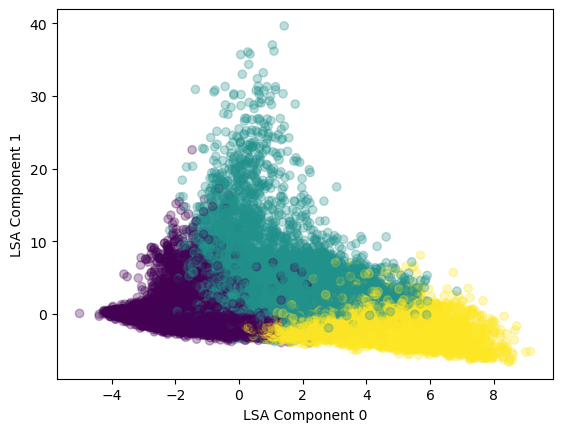

In [45]:
plt.scatter(km_data[0], km_data[1], c=km_data['label'], alpha=0.3)
plt.xlabel('LSA Component 0')
plt.ylabel('LSA Component 1')